# **About a company**
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

# Questions for the analysis
1.  What are some trends in smart device usage?
2.   How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy





# Business task
Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# Loading the libraries

In [ ]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Reading the csv files

In [ ]:
activity <- read.csv("dailyActivity_merged.csv")
calories <- read.csv("hourlyCalories_merged.csv")
intensities <- read.csv("hourlyIntensities_merged.csv")
sleep <- read.csv("sleepDay_merged.csv")
weight <- read.csv("weightLogInfo_merged.csv")

In [ ]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


# Formating the dataset

In [ ]:
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

In [ ]:
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

In [ ]:
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

In [ ]:
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

# Short Summary

In [ ]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

This information tells us about number participants in each data sets.

There is 33 participants in the activity, calories and intensities data sets, 24 in the sleep and only 8 in the weight data set. 8 participants is not significant to make any recommendations and conclusions based on this data.

Let’s have a look at summary statistics of the data sets:

In [ ]:
activity %>%
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

In [ ]:
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

In [ ]:
calories %>%
  select(Calories) %>%
  summary()

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

In [ ]:
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [ ]:
weight %>%
  select(WeightKg, BMI) %>%
  summary()

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

Here are some key insights from the summary:  

1. **Sedentary Time**: Participants spend an average of 991 minutes (approximately 16 hours) per day being sedentary. This is a significant portion of the day and should be reduced to improve overall health.  

2. **Activity Levels**: The majority of participants are lightly active, indicating limited engagement in moderate or vigorous physical activities.  

3. **Sleep Duration**: On average, participants sleep for 7 hours in a single session.  

4. **Steps Taken**: Participants take an average of 7,638 steps per day. While this is close to the recommended range, it falls slightly short of the 8,000 steps per day linked to substantial health benefits. According to the CDC, taking 8,000 steps daily reduces the risk of all-cause mortality by 51%, while taking 12,000 steps reduces it by 65%, compared to only 4,000 steps per day.  

### Recommendations:  

1. **Reduce Sedentary Time**:
   - Incorporate short, regular breaks to stand or walk for a few minutes every hour.  
   - Consider using a standing desk or scheduling periodic physical activity during work or leisure hours.  

2. **Increase Physical Activity**:
   - Gradually include moderate activities like brisk walking or cycling to transition from light activity levels.  
   - Aim for at least 150 minutes of moderate-intensity or 75 minutes of vigorous-intensity exercise weekly, as per WHO guidelines.  

3. **Enhance Step Count**:
   - Set a daily goal to reach at least 8,000 steps and progressively increase it toward 12,000.  
   - Explore activities that naturally involve walking, such as hiking, walking meetings, or running errands on foot.  

4. **Maintain Consistent Sleep Patterns**:
   - Seven hours of sleep is a good baseline; ensure it is of good quality by maintaining a consistent sleep schedule and reducing screen time before bed.  

By reducing sedentary behavior, increasing daily steps, and maintaining good sleep habits, participants can significantly improve their overall health and reduce the risk of chronic diseases.

# Merging data

In [ ]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


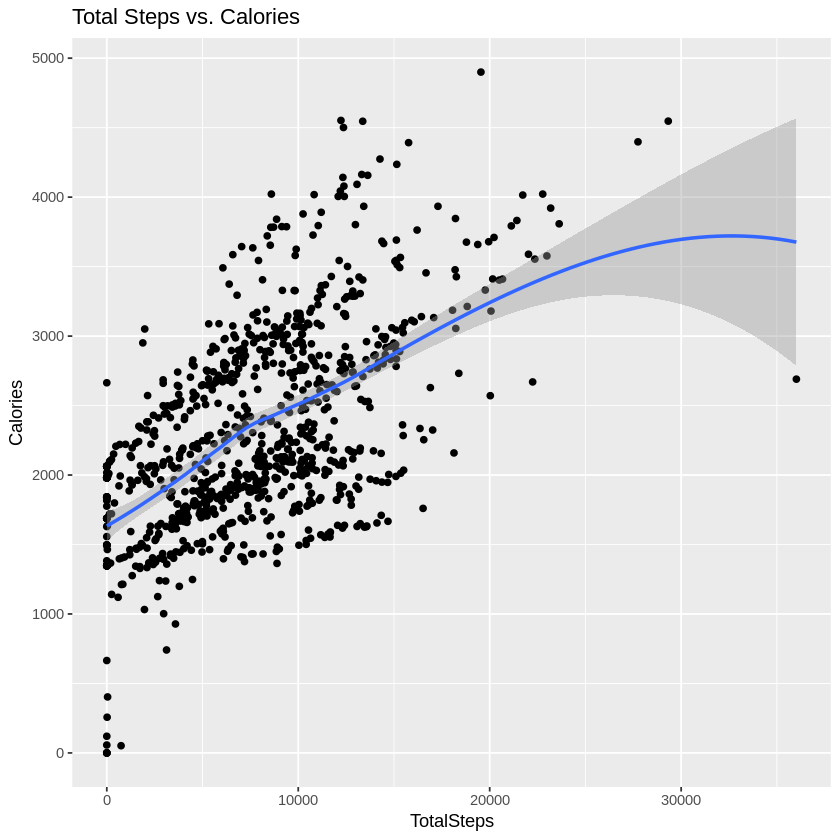

In [ ]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) +
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

A positive correlation is evident between **Total Steps** and **Calories Burned**, which aligns with expectations—the more active we are, the more calories we burn. This highlights the importance of regular physical activity in managing energy expenditure and maintaining a healthy lifestyle.
___
### Recommendations:
1. **Increase Daily Steps**:
   - Aim to meet or exceed the 8,000-step threshold to boost calorie burn and overall health. Gradually increase your step goal to 12,000 for even greater benefits.
   - Incorporate walking into your daily routine, such as walking to work, taking the stairs, or going for a brisk walk after meals.

2. **Diversify Physical Activity**:
   - Combine walking with other calorie-burning activities like cycling, swimming, or strength training to enhance total energy expenditure.
   - Engage in activities you enjoy to stay consistent and motivated.

3. **Monitor Progress**:
   - Use a fitness tracker to measure daily steps and calories burned. Analyze patterns to identify opportunities to increase activity levels.

By staying active and mindful of daily movement, individuals can efficiently manage calorie burn, support weight management, and improve overall health outcomes.

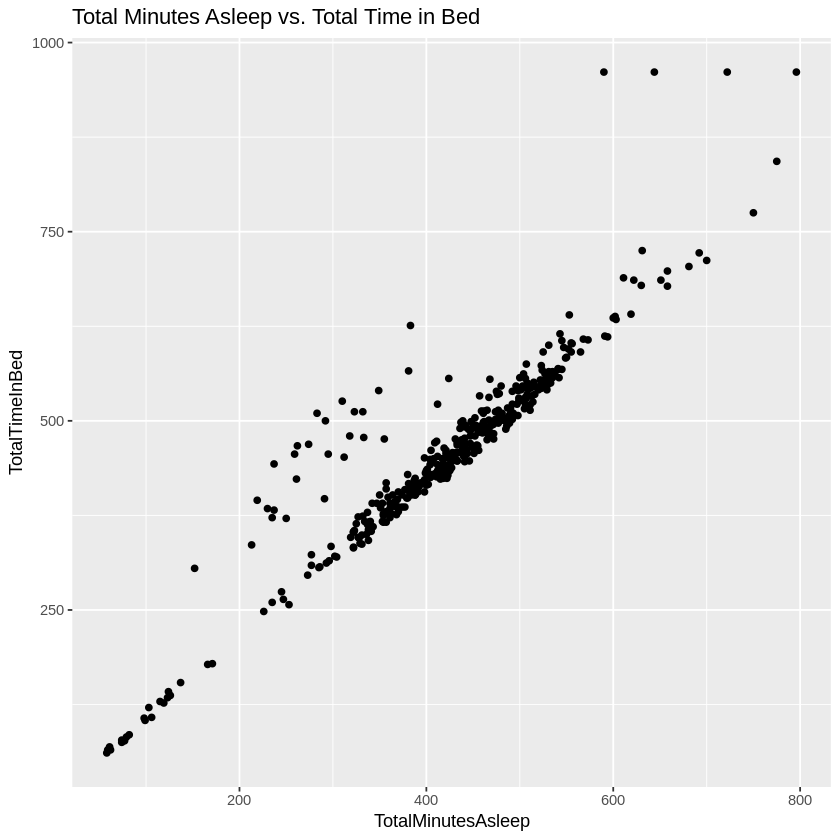

In [ ]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

The relationship between **Total Minutes Asleep** and **Total Time in Bed** appears linear, suggesting that maximizing time in bed could improve sleep duration. Encouraging Bellabeat users to establish a consistent bedtime routine may enhance sleep quality.
___

### Recommendations:
1. **Introduce Sleep Notifications**:  
   - Set up reminders to go to bed at a consistent time each night to ensure users get sufficient sleep.

2. **Track Sleep Efficiency**:  
   - Encourage users to monitor the ratio of time spent asleep versus time in bed and identify potential sleep disruptors (e.g., screen time, caffeine intake).

3. **Create a Relaxing Bedtime Routine**:  
   - Suggest calming activities like reading, meditation, or listening to soothing music before bed to improve sleep onset and quality.

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


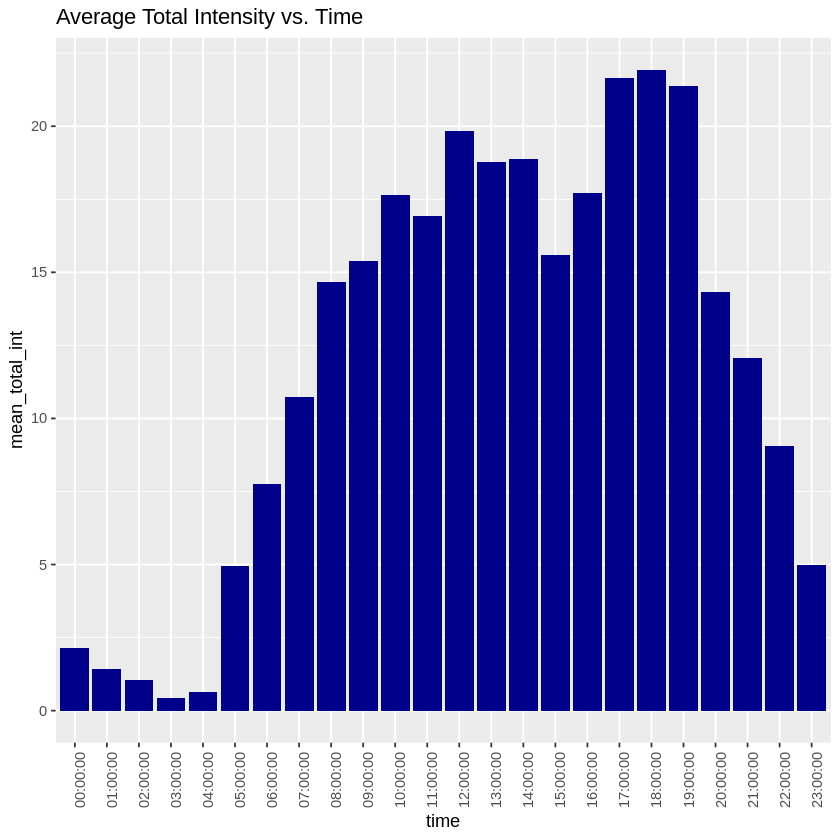

In [ ]:
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

After visualizing **Total Intensity Hourly**, it’s clear that users are most active between **5 AM and 10 PM**, with peak activity occurring between **5 PM and 7 PM**. This suggests that many users likely engage in exercise or walks
after work.  
___

### Recommendations:  
1. **Timely Motivational Reminders**:  
   - Utilize the **5 PM to 7 PM window** in the Bellabeat app to send encouraging notifications, such as reminders to go for a walk, run, or workout.

2. **Activity Suggestions**:  
   - Provide tailored suggestions for short, effective workouts or outdoor activities during peak activity times.  

3. **Track Progress**:  
   - Encourage users to track their steps or calories burned during these peak hours to foster engagement and build a habit.  


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


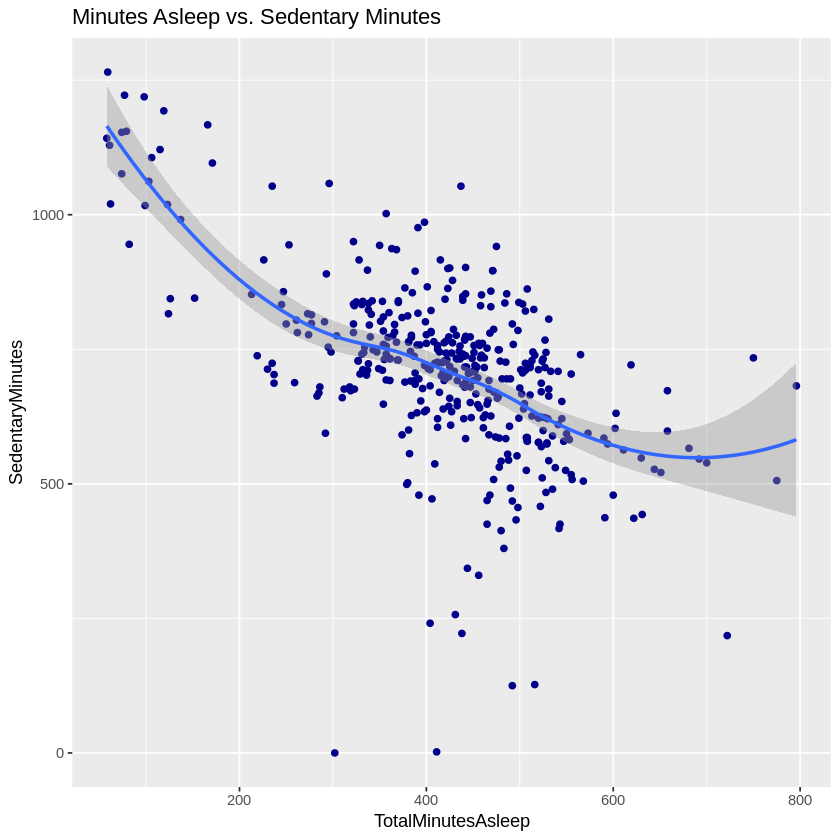

In [ ]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

There is a clear negative relationship between **Sedentary Minutes** and **Sleep Time**—the more sedentary a user is, the less sleep they tend to get.  
___

### Recommendations:  
1. **Promote Active Breaks**:  
   - The Bellabeat app can encourage users to take regular breaks from sedentary behavior throughout the day to improve overall activity levels, which may positively influence sleep.  

2. **Evening Activity Reminders**:  
   - Provide users with gentle reminders to engage in light physical activities, such as stretching or a short walk, before bed to enhance sleep quality.  

3. **Support with More Data**:  
   - Emphasize the importance of deeper analysis to confirm this relationship and remind users that correlation does not imply causation. Incorporate personalized insights as more data is gathered.  


### **Summary of Recommendations for Bellabeat**  

1. **Reduce Sedentary Time**:  
   - Encourage users to take regular breaks from sitting through app notifications.  
   - Promote light evening activities, like stretching or walking, to enhance sleep quality.  

2. **Leverage Peak Activity Times**:  
   - Target the 5 PM to 7 PM window for motivational reminders, encouraging workouts, walks, or other physical activities.  

3. **Improve Sleep Habits**:  
   - Introduce bedtime reminders to help users establish consistent sleep routines.  
   - Provide personalized insights on the relationship between activity levels and sleep quality.  

4. **Motivate Increased Step Counts**:  
   - Encourage users to aim for at least 8,000 daily steps, progressively increasing to 12,000 for maximum health benefits.  

5. **Emphasize Data-Driven Insights**:  
   - Use in-app messaging to educate users on the importance of reducing sedentary behavior and improving activity levels, supported by data.  
   - Highlight that correlation doesn’t imply causation and commit to refining recommendations as more data is collected.  

By implementing these strategies, Bellabeat can help users achieve better health outcomes while increasing app engagement and loyalty.